## Assignment 13: Python for Machine Learning
Tierney O'Sullivan  
December 1, 2023

Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points).   
Be sure to review the readings before you start on this assignment.   

Calculate the sum of least square error for each different values of 'k'. 

Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points).  

Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

### Import libraries

In [100]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data
The dataset we're using today are arrhythmia data from UC Irvine: https://archive.ics.uci.edu/dataset/5/arrhythmia  


In [101]:
df = pd.read_csv('arrhythmia/arrhythmia.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


### Visualize the data
We can use the pandas describe function and then the boxplot function to iteratively go through the variables and plot them to see if the values look plausible. This could be important if we found negative values for age or something like that. 

In [102]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


We know from the documentation that there are missing values in this datatset, and that they are labelled with "?"

Let's see if there are any question marks.

In [103]:
np.where(df=="?")

(array([  0,   1,   3,   4,   4,   5,   6,   7,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  54,  55,  57,  58,  59,  59,  60,  61,  62,  63,  64,  65,
         66,  66,  67,  68,  69,  70,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  87,  90,  91,  91,  92,  94,  95,
         96,  97,  98, 100, 101, 102, 103, 104, 105, 106, 106, 107, 108,
        109, 110, 111, 113, 114, 115, 116, 116, 117, 118, 119, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 176, 177, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186

Let's use a lambda function to coerce the ? to a missing value. 

In [104]:
df2 = df.apply(lambda s: pd.to_numeric(s, errors='coerce'))

Now check for question marks 

In [105]:
np.where(df2=="?")

(array([], dtype=int64), array([], dtype=int64))

In [106]:
df2.shape[1] # get the number of columns in the data frame

280

Since there are so many variables, let's create a for loop that puts 20 variables on each plot. 

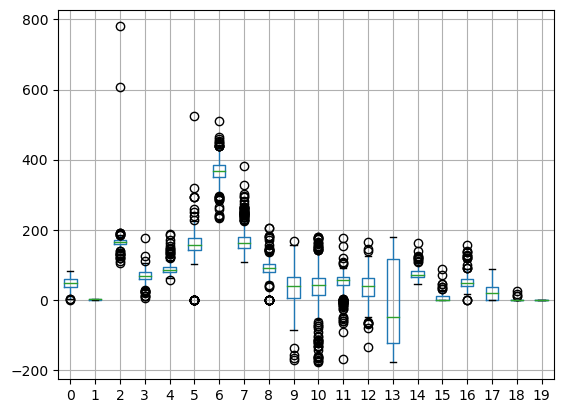

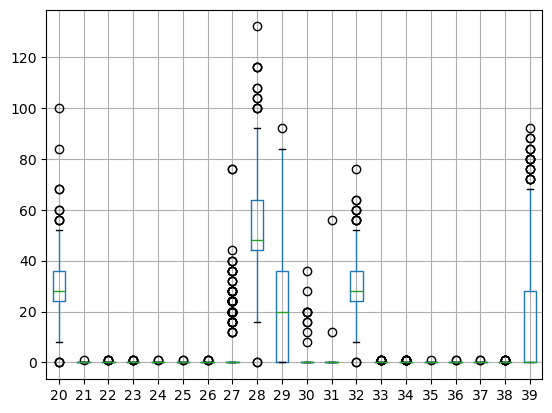

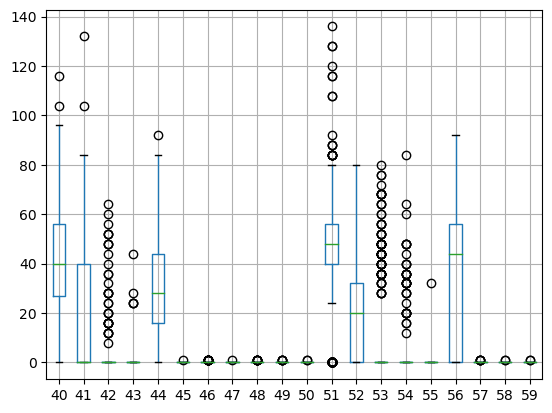

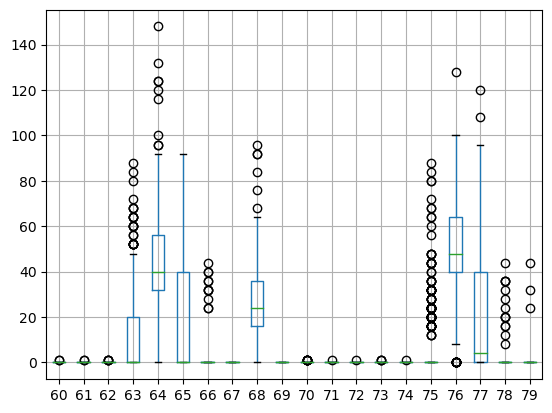

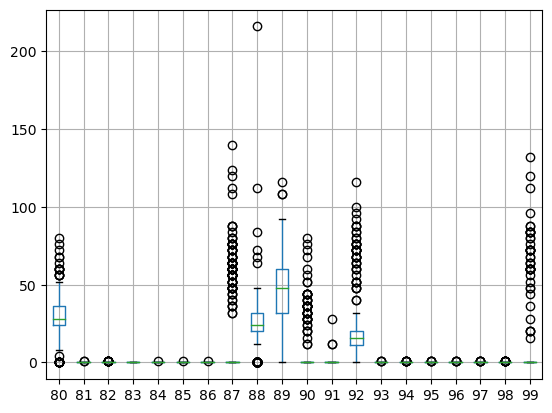

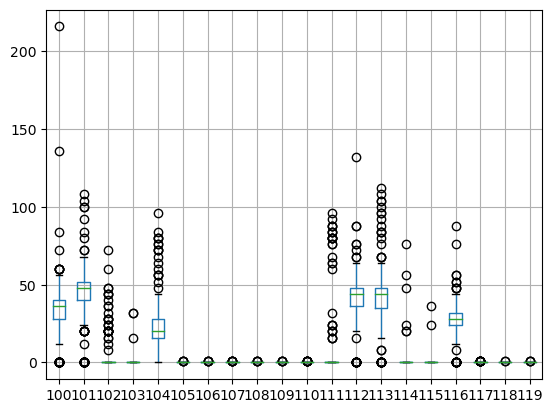

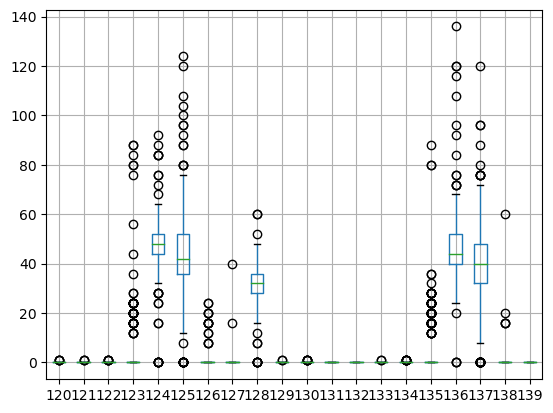

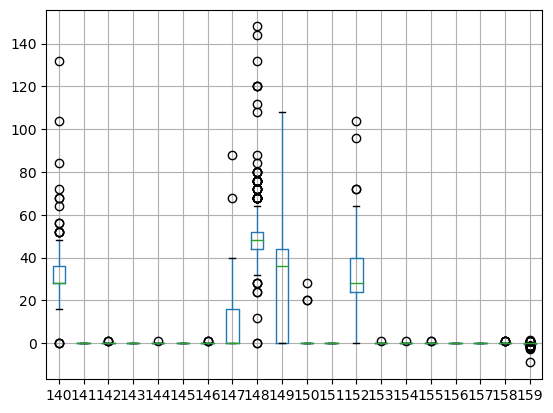

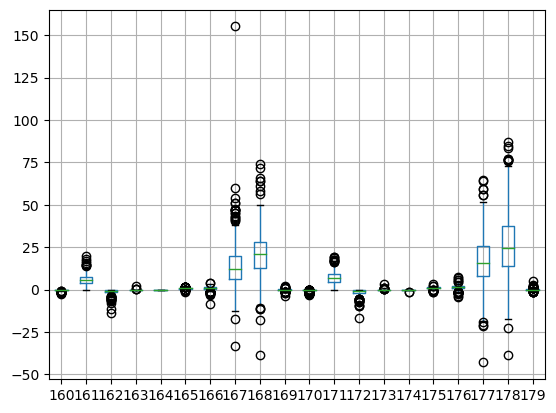

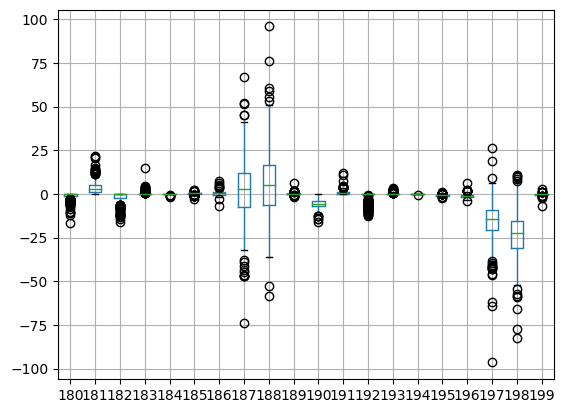

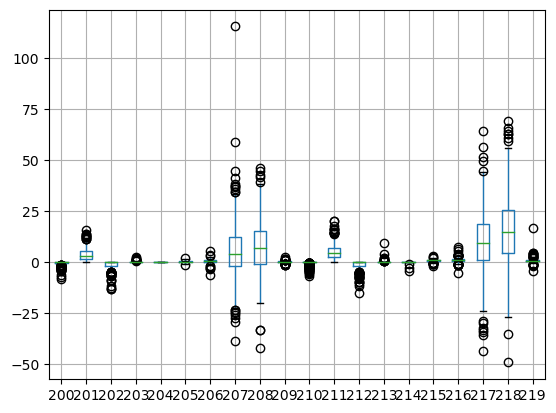

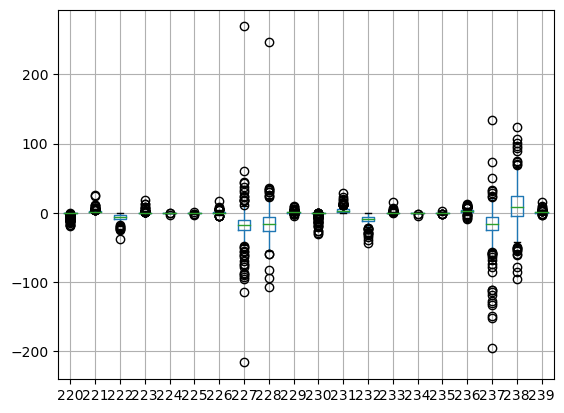

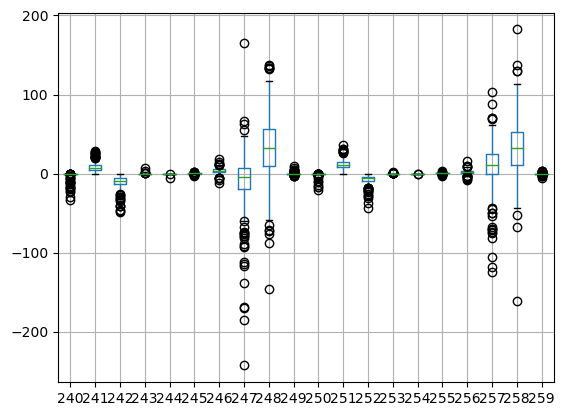

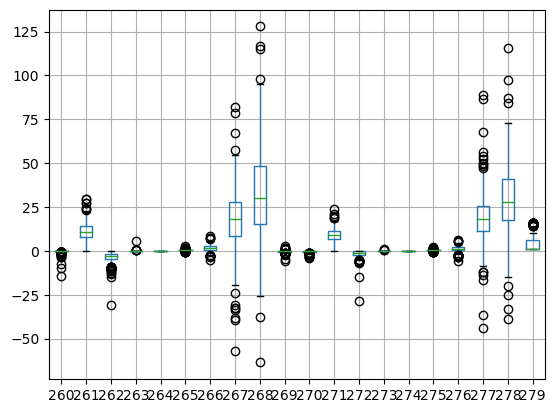

In [107]:
# create a series that establishes the index for the start of each plot
var = range(0, 280, 20)
# loop through the indeces of the columns to fit 20 on each plot
for i in var:
    j = i + 19
    df2.loc[:,i:j].boxplot()
    plt.show()



We've now had a look at the data. Let's impute missing values with the median

In [108]:
df3 = df2.fillna(df2.median())

### Create a train test split

In [109]:
from sklearn.model_selection import train_test_split

# column 279 is the class of the heart arrhythmia, so we'll use it as the y variable
# all other columns are used as x variable
# 33% of values go into the test split, all others go into train split
# use random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(df3.drop(df3.columns[279], axis=1),\
                                                     df3.loc[:,279], test_size=0.33, random_state=0)

## Preprocessing to Normalize the covariates

In [110]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

### Fit kmeans cluster algorithm to arrhythmia data

In [111]:
from sklearn.cluster import KMeans

# run k means clustering algorithm to the X training data
# specify the number of clusters to 3
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init=10, random_state=0)

Calculate the within-cluster sum of squared errors (WSS), which is a metric that can be used to assess the distance between each sample and it's cluster centroid. High score values can indicate that the sample is far from it's centroid. It's already a metric that is built into the kmeans model fit, and it's called "inertia_".

In [118]:

kmeans.inertia_

27.057778166275273

Let's see if we can choose a better number of clusters to increase this value closer to 0. 

In [125]:
K = range(2, 30)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(model.inertia_)

Plot the elblow plot of the WSS to determine if there is an appropriate number of clusters, from 2 to 30. 

/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

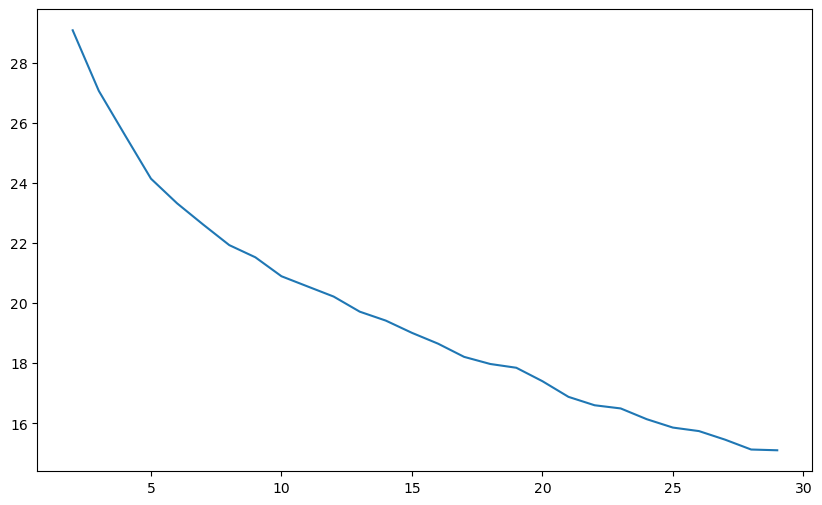

In [126]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

There doesn't seem to be an obvious "elbow" or cutoff that minimizes the clusters. Perhaps WSS is not a good method for determining the optimal cluster size. Let's try the silhouette method instead. 

The silhouette score is another metric that can be used to determine if the data are assigned to too many or too few clusters. Ideally, we're looking for a silhouette score close to 1. 

In [127]:
K = range(2, 30)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

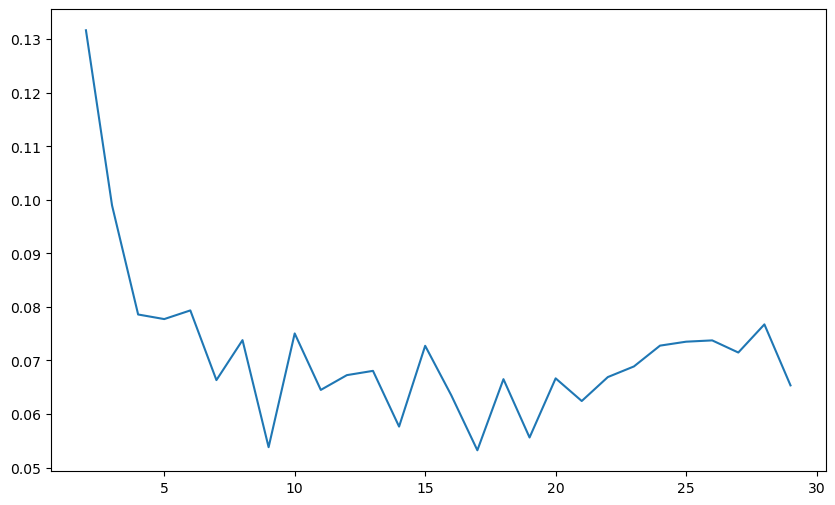

In [128]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

Since we are aiming for a maximum, this indicates that the peak occurs when we have just two clusters. 

### Plotting the results

Since we have a large number of predictor variables, it will be difficult to look at all of them in two-dimensional space. Let's look at a few of interest to see if we can see any separation in the clustering. 

/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

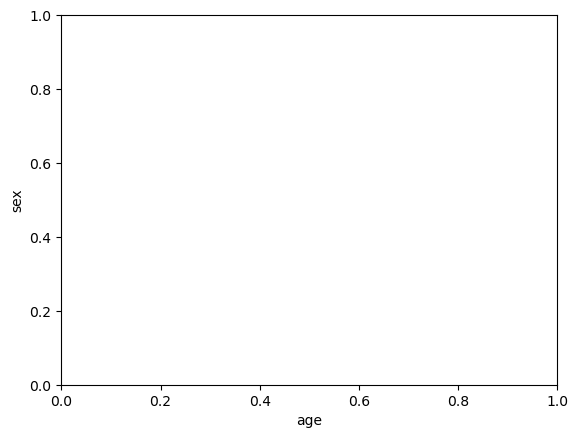

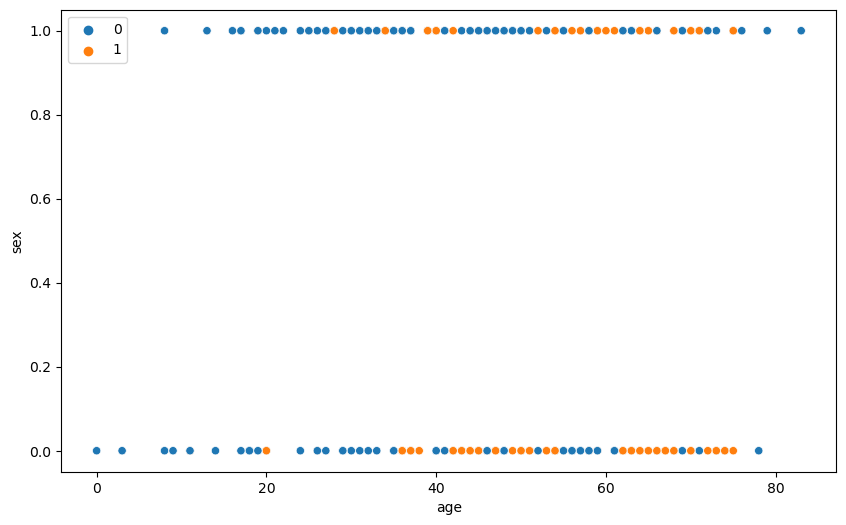

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 0, y = 1, hue = fits[0].labels_)
plt.xlabel('age')
plt.ylabel('sex')
plt.show()

Looking at cluster 0 in blue, it seems to be more common in younger patients than cluster 1 in orange. Additionally, cluster 1 seems to be more common in men (sex = 0) than in women (sex = 1).


/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tierney/miniconda3/envs/bmi6018/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

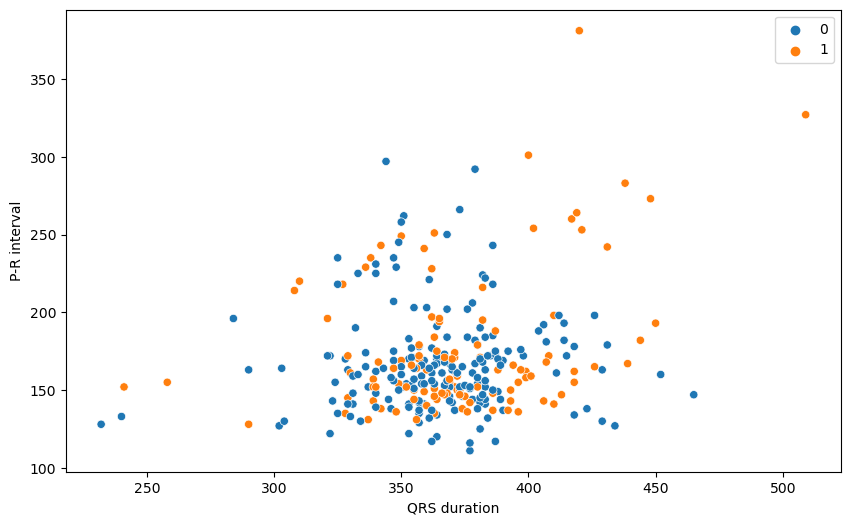

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 6, y = 7, hue = fits[0].labels_)
plt.xlabel('QRS duration')
plt.ylabel('P-R interval')
plt.show()

There is not a great deal of separation across the clusters in QRS duration and P-R intervals, but it is evident that those values that have both long QRS duration and P-R intervals are all assigned to cluster 1 (orange).

### Using PCA of our data to better visualize

We use Principal components analysis in this final step to visualize all of the high dimensionality of our data into 2 orthogonal components, or vectors. This will allow us to plot our data in two dimensions and see where the data fall, where the decision boundary is, and how distinc the clusters are from each other. 

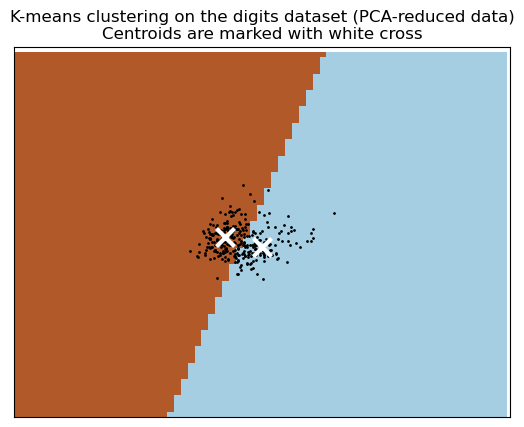

In [144]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(X_train_norm)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.04  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Overall, the clusters are given by separation across this line in the PCA space, and there is little evidence that the data would be better distinguished if we used a higher number of clusters. In general, there is not a great degree of separation in the observations we have, and it would be good to increase the sample size to get a better performing kmeans clustering algorithm. 